# Pizza Price Prediction 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("pizza_v2.csv")

In [3]:
df

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes
...,...,...,...,...,...,...,...,...,...
124,E,"Rp39,000",8.5 inch,tuna,spicy tuna,small,yes,yes,yes
125,E,"Rp72,000",12 inch,tuna,spicy tuna,medium,yes,yes,yes
126,E,"Rp99,000",14 inch,tuna,spicy tuna,large,yes,yes,yes
127,E,"Rp44,000",8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [5]:
df.isnull().count()

company            129
price_rupiah       129
diameter           129
topping            129
variant            129
size               129
extra_sauce        129
extra_cheese       129
extra_mushrooms    129
dtype: int64

In [6]:
df['diameter'].value_counts()

12 inch      49
14 inch      23
8.5 inch     22
17 inch      10
18.5 inch     6
16 inch       5
8 inch        4
16.5 inch     4
22 inch       3
20 inch       1
14 inch\n     1
18 inch       1
Name: diameter, dtype: int64

In [7]:
df['variant'].value_counts()

classic              30
crunchy              10
double_mix           10
new_york             10
meat_lovers          10
double_decker         9
super_supreme         5
american_favorite     5
double_signature      5
BBQ_meat_fiesta       5
BBQ_sausage           3
spicy tuna            3
gournet_greek         3
neptune_tuna          3
meat_eater            3
thai_veggie           3
american_classic      3
extravaganza          3
spicy_tuna            3
italian_veggie        3
Name: variant, dtype: int64

In [8]:
df['topping'].value_counts()

chicken         29
mushrooms       22
mozzarella      21
smoked_beef     19
vegetables       9
tuna             9
meat             8
sausage          3
beef             3
black_papper     3
papperoni        2
onion            1
Name: topping, dtype: int64

In [9]:
df['size'].value_counts()

medium     41
small      22
large      21
reguler    20
jumbo      15
XL         10
Name: size, dtype: int64

In [10]:
df['extra_sauce'].value_counts()

yes    76
no     53
Name: extra_sauce, dtype: int64

In [11]:
df['extra_cheese'].value_counts()

yes    86
no     43
Name: extra_cheese, dtype: int64

In [12]:
df['extra_mushrooms'].value_counts()

yes    72
no     57
Name: extra_mushrooms, dtype: int64

In [13]:
df['price_rupiah'] = df['price_rupiah'].str.replace('Rp','').str.replace(',','').astype('float64')
df['diameter'] = df['diameter'].str.replace('inch','').str.replace(',','').astype('float')

In [14]:
df.loc[:,['price_rupiah','diameter']]

,price_rupiah,diameter
0,235000.0,22.0
1,198000.0,20.0
2,120000.0,16.0
3,155000.0,14.0
4,248000.0,18.0
...,...,...
124,39000.0,8.5
125,72000.0,12.0
126,99000.0,14.0
127,44000.0,8.5


In [15]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
company,A,A,A,A,A,A,A,A,A,A,...,E,E,E,E,E,E,E,E,E,E
price_rupiah,235000.0,198000.0,120000.0,155000.0,248000.0,140000.0,110000.0,70000.0,90000.0,90000.0,...,46000.0,72000.0,49000.0,83000.0,96000.0,39000.0,72000.0,99000.0,44000.0,78000.0
diameter,22.0,20.0,16.0,14.0,18.0,18.5,16.0,8.0,12.0,12.0,...,12.0,14.0,12.0,17.0,12.0,8.5,12.0,14.0,8.5,12.0
topping,chicken,papperoni,mushrooms,smoked_beef,mozzarella,black_papper,smoked_beef,papperoni,mushrooms,smoked_beef,...,mushrooms,mozzarella,smoked_beef,chicken,mushrooms,tuna,tuna,tuna,meat,meat
variant,double_signature,double_signature,double_signature,double_signature,double_signature,american_favorite,american_favorite,american_favorite,american_favorite,american_favorite,...,classic,classic,crunchy,new_york,double_decker,spicy tuna,spicy tuna,spicy tuna,BBQ_meat_fiesta,BBQ_meat_fiesta
size,jumbo,jumbo,reguler,reguler,jumbo,jumbo,jumbo,reguler,reguler,reguler,...,medium,large,medium,XL,medium,small,medium,large,small,medium
extra_sauce,yes,yes,yes,yes,yes,no,no,no,yes,no,...,yes,yes,no,no,no,yes,yes,yes,yes,no
extra_cheese,yes,yes,yes,no,no,no,yes,no,no,no,...,yes,yes,yes,yes,yes,yes,yes,yes,no,no
extra_mushrooms,no,no,yes,yes,yes,yes,yes,yes,yes,no,...,no,no,no,no,yes,yes,yes,yes,yes,yes


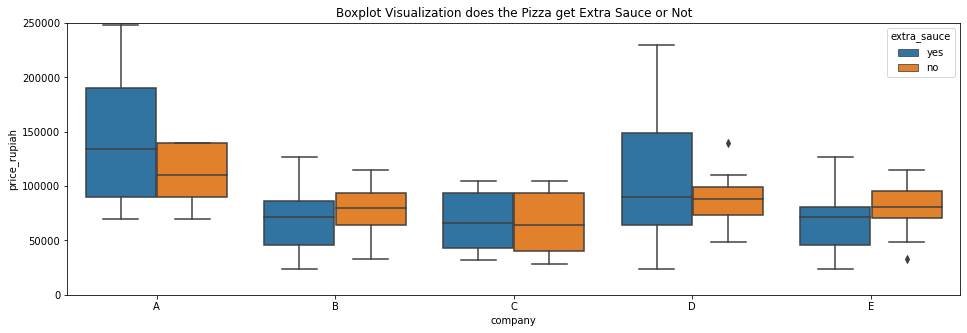

In [16]:
plt.figure(figsize=(16, 5))
sns.boxplot(x='company', y='price_rupiah', data=df, hue='extra_sauce')
plt.title('Boxplot Visualization does the Pizza get Extra Sauce or Not')
plt.ylim(0, 250000)
plt.show()

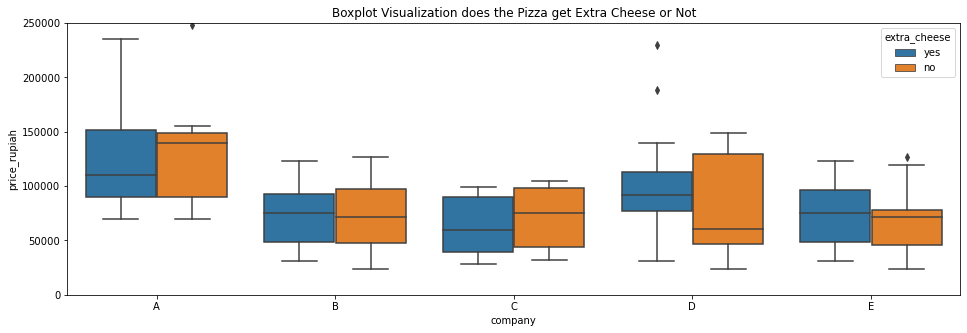

In [17]:
plt.figure(figsize=(16, 5))
sns.boxplot(x='company', y='price_rupiah', data=df, hue='extra_cheese')
plt.title('Boxplot Visualization does the Pizza get Extra Cheese or Not')
plt.ylim(0, 250000)
plt.show()

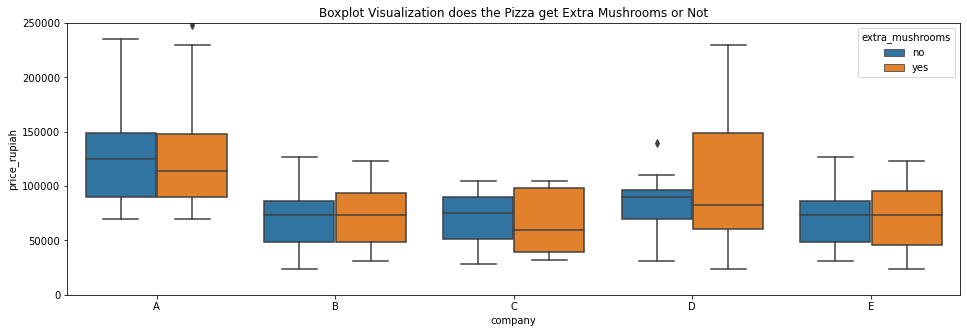

In [18]:
plt.figure(figsize=(16, 5))
sns.boxplot(x='company', y='price_rupiah', data=df, hue='extra_mushrooms')
plt.title('Boxplot Visualization does the Pizza get Extra Mushrooms or Not')
plt.ylim(0, 250000)
plt.show()

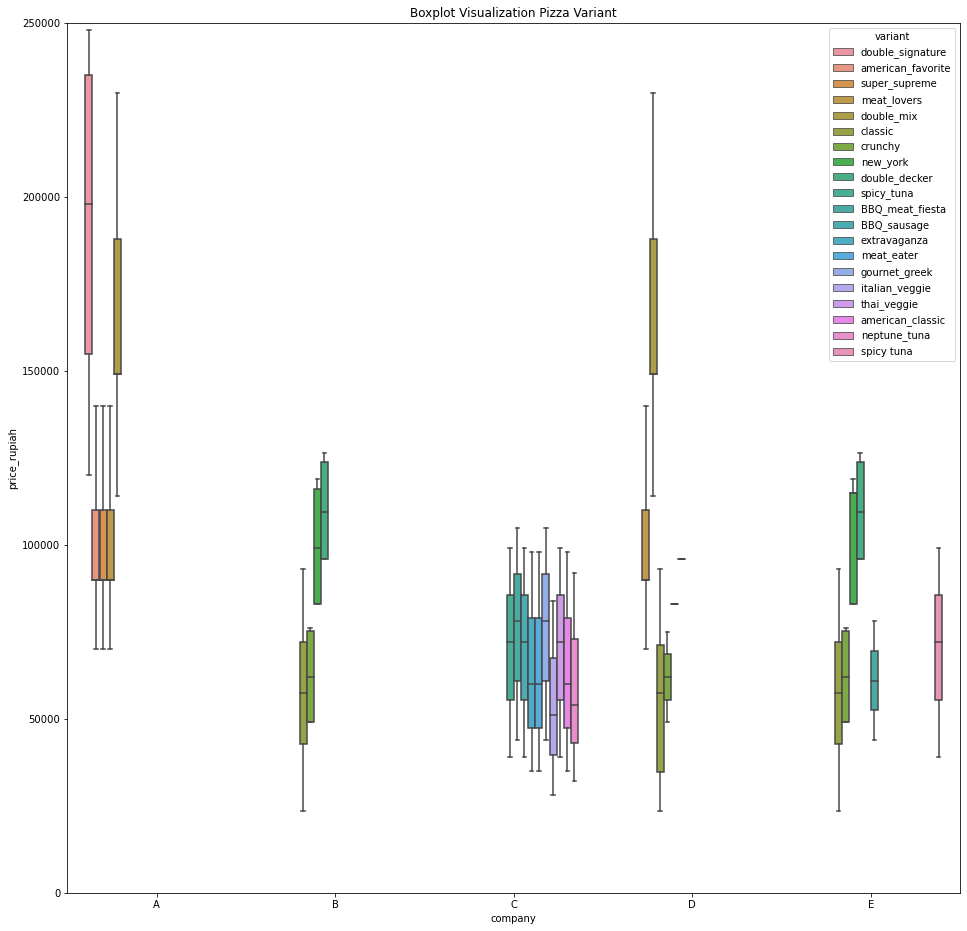

In [19]:
plt.figure(figsize=(16, 16))
sns.boxplot(x='company', y='price_rupiah', data=df, hue='variant')
plt.title('Boxplot Visualization Pizza Variant')
plt.ylim(0, 250000)
plt.show()

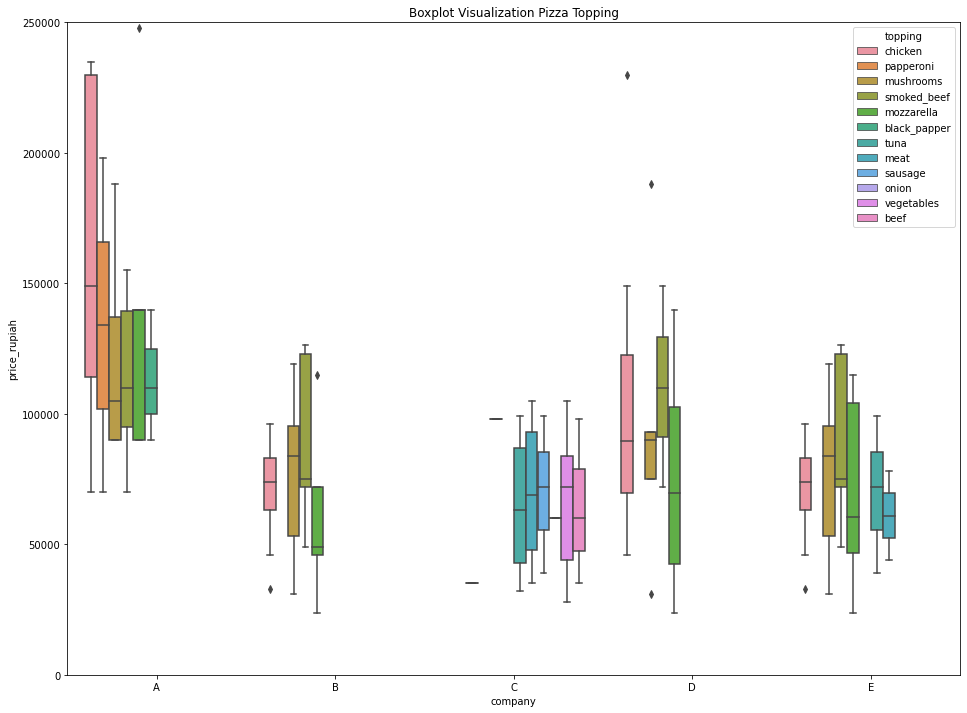

In [20]:
plt.figure(figsize=(16, 12))
sns.boxplot(x='company', y='price_rupiah', data=df, hue='topping')
plt.title('Boxplot Visualization Pizza Topping')
plt.ylim(0, 250000)
plt.show()

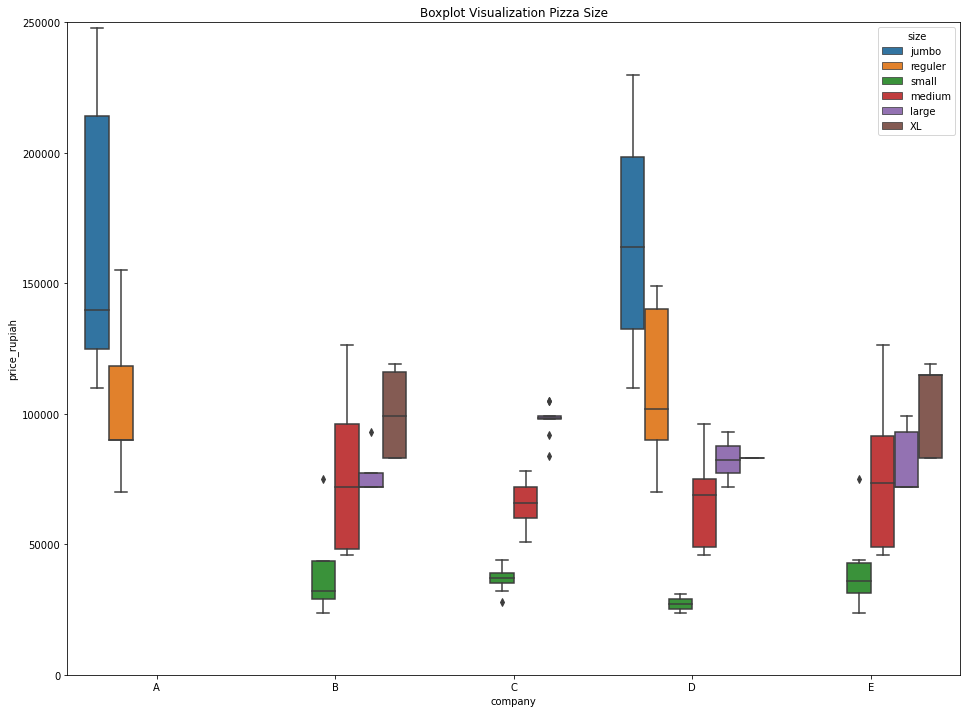

In [21]:
plt.figure(figsize=(16, 12))
sns.boxplot(x='company', y='price_rupiah', data=df, hue='size')
plt.title('Boxplot Visualization Pizza Size')
plt.ylim(0, 250000)
plt.show()

# Heat Map

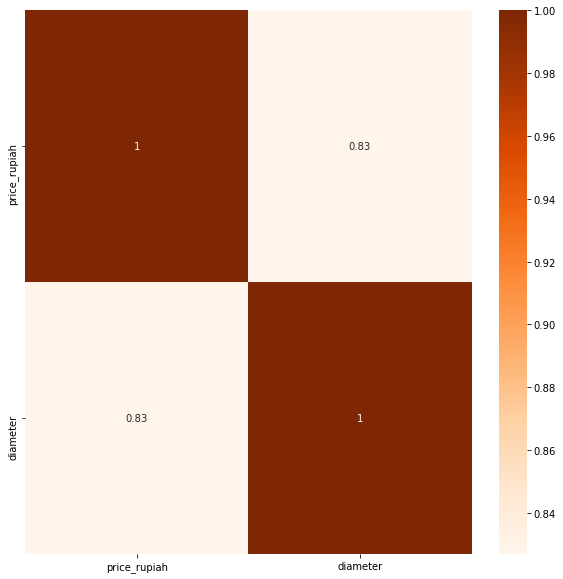

In [22]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, cmap = "Oranges")
plt.show()

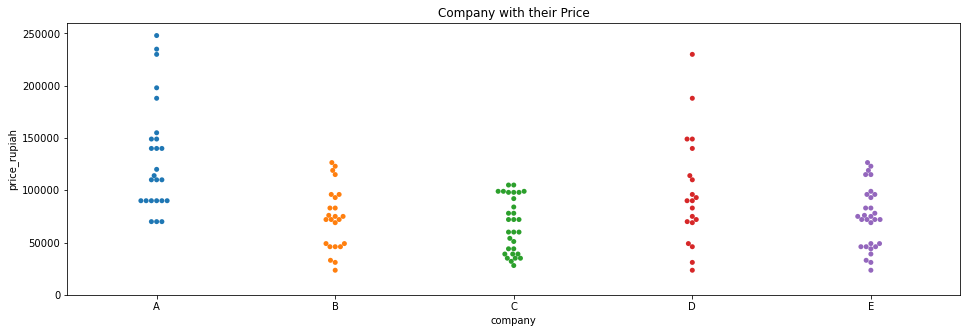

In [23]:
plt.figure(figsize=(16, 5))
sns.swarmplot(x='company', y='price_rupiah', data=df)
plt.title('Company with their Price')
plt.ylim(0, 260000)
plt.show()

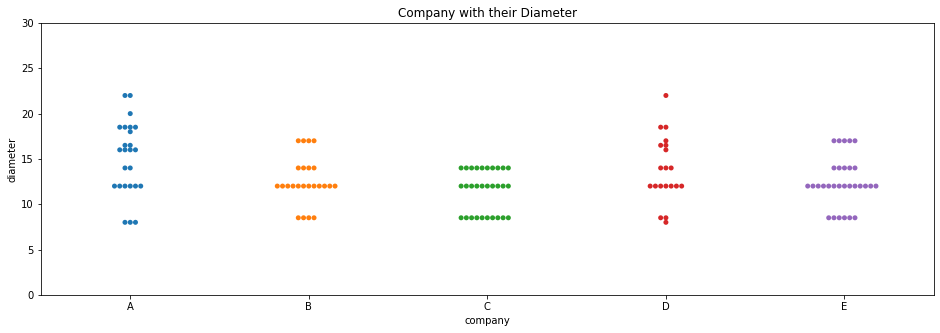

In [24]:
plt.figure(figsize=(16, 5))
sns.swarmplot(x='company', y='diameter', data=df)
plt.title('Company with their Diameter')
plt.ylim(0, 30)
plt.show()

# Encoding

we need to encode the data since this data is a categorical data, and i'm using LabelEncoder here, since this data have a lot of categorical data.

In [25]:
from sklearn.preprocessing import LabelEncoder # Import the Encoder
encoder = LabelEncoder()

In [26]:
for i in df.columns: # Make a for loops
    if df[i].dtype == 'object': 
        encoder.fit_transform(list(df[i].values)) # Fit transform
        df[i] = encoder.transform(df[i].values) # Transform
         
        for j in df.columns: # Make a for loops again
            if df[j].dtype == 'int':
                df[j] = df[j].astype('float64') # Change the type

In [27]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0.0,235000.0,22.0,2.0,8.0,1.0,1.0,1.0,0.0
1,0.0,198000.0,20.0,7.0,8.0,1.0,1.0,1.0,0.0
2,0.0,120000.0,16.0,5.0,8.0,4.0,1.0,1.0,1.0
3,0.0,155000.0,14.0,9.0,8.0,4.0,1.0,0.0,1.0
4,0.0,248000.0,18.0,4.0,8.0,1.0,1.0,0.0,1.0


# Splitting, Modeling, Model Evaluation

# Split the Data

Divide the data and split it using train test split module from sklearn.

In [28]:
x = df.drop(columns=['price_rupiah']) # Data X
y = df['price_rupiah'] # Data y

In [29]:
x

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0.0,22.0,2.0,8.0,1.0,1.0,1.0,0.0
1,0.0,20.0,7.0,8.0,1.0,1.0,1.0,0.0
2,0.0,16.0,5.0,8.0,4.0,1.0,1.0,1.0
3,0.0,14.0,9.0,8.0,4.0,1.0,0.0,1.0
4,0.0,18.0,4.0,8.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
124,4.0,8.5,10.0,16.0,5.0,1.0,1.0,1.0
125,4.0,12.0,10.0,16.0,3.0,1.0,1.0,1.0
126,4.0,14.0,10.0,16.0,2.0,1.0,1.0,1.0
127,4.0,8.5,3.0,0.0,5.0,1.0,0.0,1.0


In [30]:
y

0      235000.0
1      198000.0
2      120000.0
3      155000.0
4      248000.0
         ...   
124     39000.0
125     72000.0
126     99000.0
127     44000.0
128     78000.0
Name: price_rupiah, Length: 129, dtype: float64

# Modeling

Since the data is for predicting numeric or price, from that, we can know, this data is a regression model, then i'm using XGBRegressor, RandomforestRegressor, GradientBoostingRegressor, KNeighborsRegressor, SVR, DecisionTreeRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor,BaggingRegressor for that.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor,BaggingRegressor
from xgboost import XGBRegressor

In [32]:
acc = []

for i in range(100):
    xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=i)
    regressor = RandomForestRegressor()
    regressor.fit(xtrain,ytrain)
    ypred=regressor.predict(xtest)
    acc.append(r2_score(ytest,ypred))

In [33]:
np.argmax(acc)

5

In [34]:
acc[np.argmax(acc)]

0.9684557298822326

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=np.argmax(acc))
regressor = RandomForestRegressor()
regressor.fit(xtrain, ytrain)
ypred = regressor.predict(xtest)   
acc.append(r2_score(ytest, ypred))

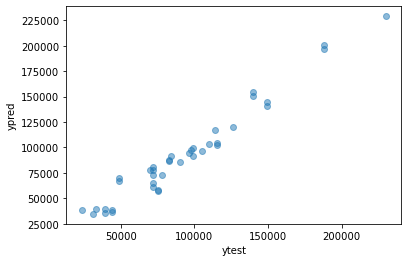

In [36]:
plt.scatter(ytest, ypred, alpha = 0.5)
plt.xlabel("ytest")
plt.ylabel("ypred")
plt.show()

In [37]:
print('MAE:', metrics.mean_absolute_error(ytest, ypred))
print('MSE:', metrics.mean_squared_error(ytest, ypred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))

MAE: 7686.153846153846
MSE: 86047474.35897435
RMSE: 9276.177788236615


In [38]:
metrics.r2_score(ytest, ypred)

0.9586971797216408

In [39]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    metrics.r2_score(ytest, ypred)
    
    print(f"R2_Score : {metrics.r2_score(ytest, ypred)}")

In [40]:
knn = KNeighborsRegressor()
svm = SVR()
dt  = DecisionTreeRegressor()
rf  = RandomForestRegressor()
xgb = XGBRegressor()
regressor = RandomForestRegressor()

In [41]:
mymodel(knn)

R2_Score : 0.8809095675815128


In [42]:
mymodel(svm)

R2_Score : -0.11644421986000997


In [43]:
mymodel(dt)

R2_Score : 0.9070737728392685


In [44]:
mymodel(rf)

R2_Score : 0.9529004643790646


In [45]:
mymodel(xgb)

R2_Score : 0.9372567415507581


In [46]:
mymodel(regressor)

R2_Score : 0.9636185719120883


# Hyperparameter Tuning

1. GridSearchCV
2. Assign hyperparameters
3. Fit the model
4. Check the best parameters and best score

In [47]:
GBR = GradientBoostingRegressor()

In [48]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
              'subsample'    : [0.9, 0.5, 0.2, 0.1],
              'n_estimators' : [100,500,1000, 1500],
              'max_depth'    : [4,6,8,10]
             }

In [49]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(xtrain, ytrain)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [50]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500,
                          subsample=0.2)

 The best score across ALL searched params:
 0.6192977092805588

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.2}


# Model Evaluation

In [51]:
from sklearn import metrics
import math

In [68]:
pred_train = regressor.predict(xtrain) # Predict Train Data
pred_test = regressor.predict(xtest) # Predict Test Data

# Evaluate Train Data

In [69]:
train_r2_score = metrics.r2_score(ytrain, pred_train) # R2_score
print(f'Train R2_score: {train_r2_score}')

train_mse = metrics.mean_squared_error(ytrain, pred_train) # MSE Score
print(f'Train MSE : {train_mse}')

train_RMSE = math.sqrt(metrics.mean_squared_error(ytrain, pred_train)) # SQRT MSE Score
print(f'Train RMSE : {train_RMSE}')

Train R2_score: 0.9768976212148124
Train MSE : 44387870.277777776
Train RMSE : 6662.422253038138


Visualization for Actual and Predicted Price in Training Data

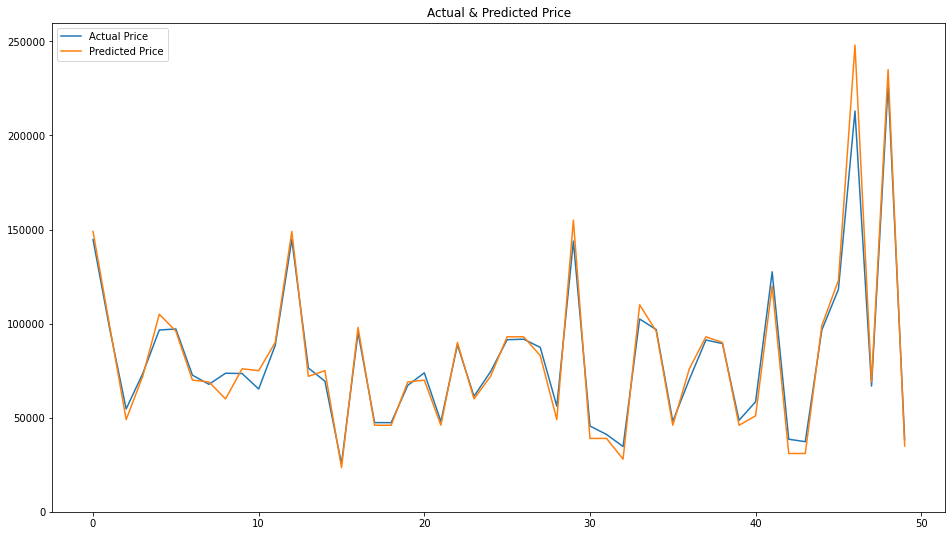

In [54]:
test = pd.DataFrame({'Predicted Price':pred_train, 'Actual Price':ytrain})
fig  = plt.figure(figsize=(16, 9))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.ylim(0, 260000)
plt.legend(['Actual Price','Predicted Price'])
plt.title('Actual & Predicted Price')
plt.show()

# Evaluate Test Data

In [55]:
test_r2_score = metrics.r2_score(ytest, pred_test) # R2_score
print(f'Test R2_score: {test_r2_score}')

test_mse = metrics.mean_squared_error(ytest, pred_test) # MSE Score
print(f'Test MSE : {test_mse}')

test_RMSE = math.sqrt(metrics.mean_squared_error(ytest, pred_test)) # SQRT MSE Score
print(f'Test RMSE : {test_RMSE}')

Test R2_score: 0.9636185719120883
Test MSE : 75794582.05128205
Test RMSE : 8706.008387962996


Visualization for Actual and Predicted Price in Testing Data

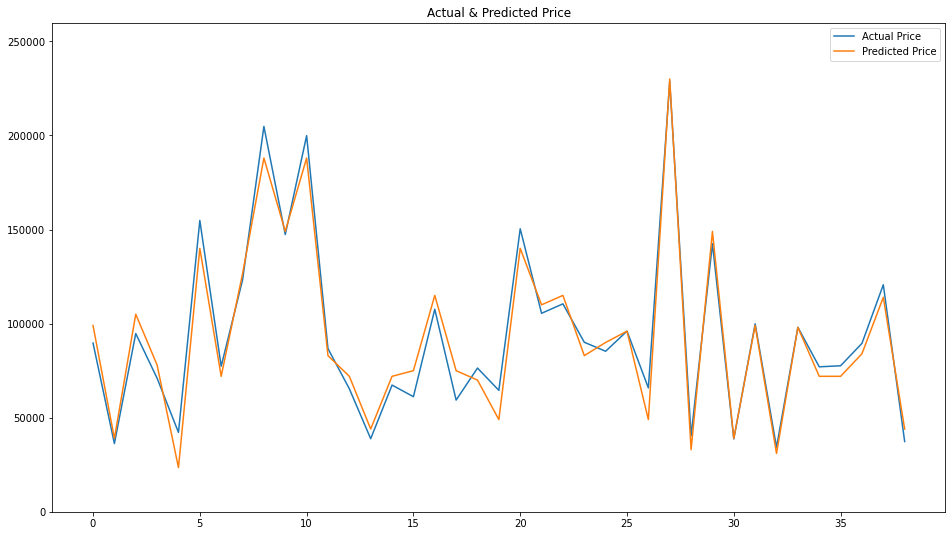

In [56]:
test = pd.DataFrame({'Predicted Price':pred_test, 'Actual Price':ytest})
fig= plt.figure(figsize=(16, 9))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.ylim(0, 260000)
plt.legend(['Actual Price','Predicted Price'])
plt.title('Actual & Predicted Price')
plt.show()

# Prediction

Output actual data with prediction data into csv file.

In [57]:
train_output = pd.DataFrame({'Train Actual Price': ytrain,'Train Predicted Price ': pred_train})

train_output.to_csv('Train Prediction.csv', index=False)

# Train Output Prediction

In [58]:
train_prediction_output = pd.read_csv('./Train Prediction.csv')
train_prediction_output.head(10)

,Train Actual Price,Train Predicted Price
0,149000.0,144690.0
1,99000.0,97490.0
2,49000.0,54660.0
3,72000.0,73440.0
4,105000.0,96620.0
5,96000.0,97150.0
6,70000.0,72610.0
7,69000.0,67760.0
8,60000.0,73640.0
9,76000.0,73480.0


In [59]:
test_output = pd.DataFrame({'Test Actual Price': ytest,'Test Predicted Price ': pred_test})

test_output.to_csv('Test Prediction.csv', index=False)

# Test Output Prediction

In [60]:
test_prediction_output = pd.read_csv('./Test Prediction.csv')
test_prediction_output.head(10)

,Test Actual Price,Test Predicted Price
0,99000.0,89680.0
1,39000.0,36260.0
2,105000.0,94725.0
3,78000.0,70970.0
4,23500.0,42215.0
5,140000.0,154850.0
6,72000.0,77345.0
7,126500.0,123190.0
8,188000.0,204800.0
9,149000.0,147335.0


# Saving the model and reusing it again

In [71]:
import pickle

In [72]:
pickle_out = open("pizza.pkl","wb")
pickle.dump(regressor, pickle_out)

loaded_model = pickle.load(open("pizza.pkl", "rb"))
y_pred = loaded_model.score(xtest,ytest)

print(y_pred)

0.9636185719120883
